# IRIS Clustering

> Enzo Sergiani


# Part 1 : Dimentionality Reduction on IRIS dataset


In [247]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

In [248]:
iris = load_iris()

X = iris.data  # The inputs
y = iris.target  # The wanted output

df = pd.DataFrame(X, columns=iris.feature_names)
df["Label"] = y
df["Species"] = df["Label"].map({0: "setosa", 1: "versicolor", 2: "virginica"})
df = df.drop(["Label"], axis=1)

In [249]:
df.head()  # The first five elements

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [250]:
df.tail()  # the last five elements

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [251]:
df.describe()  # statistical and general information about the data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


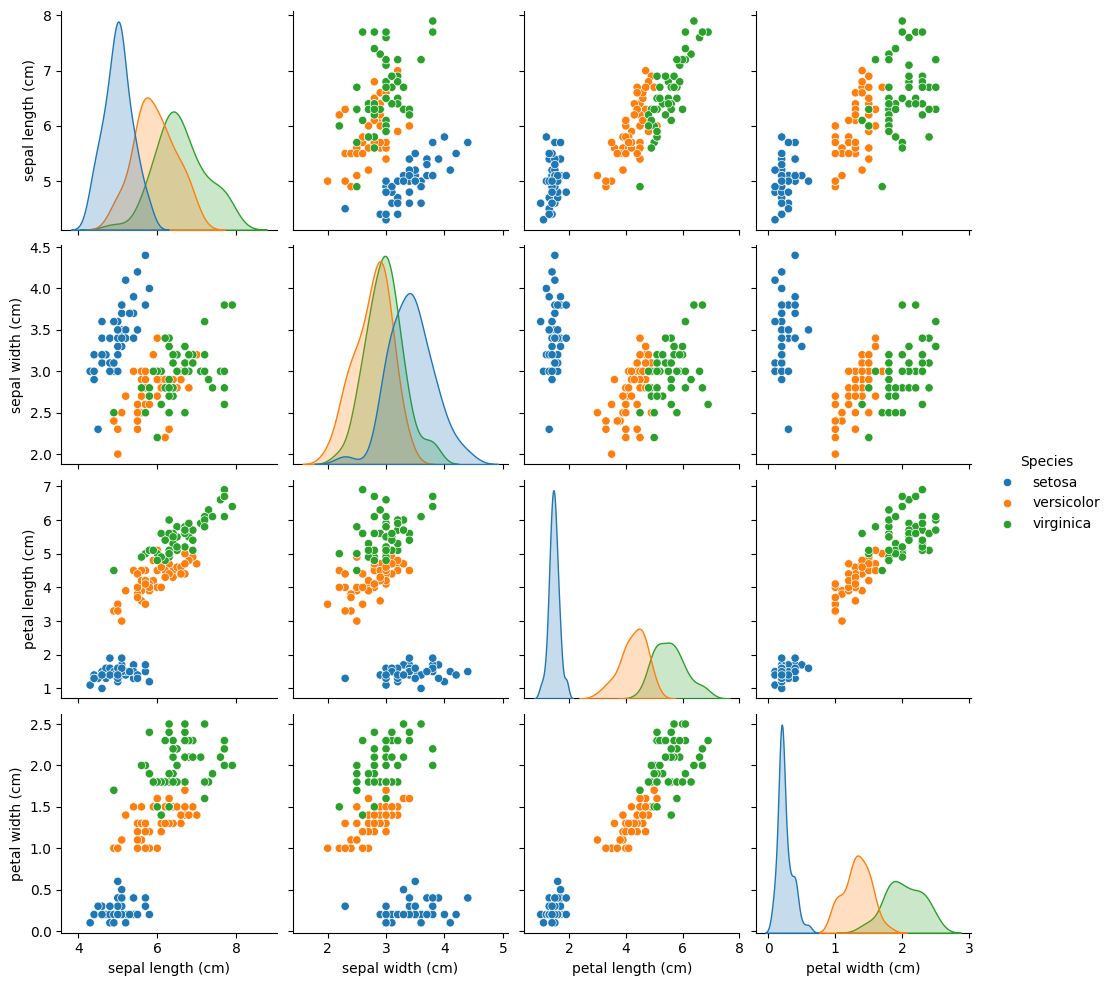

In [252]:
sns.pairplot(df, hue="Species")

In [253]:
# Transform features
pca = PCA()
X_pca = pca.fit_transform(X)

# Merge with df
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3", "PC4"])
df = pd.merge(df, pca_df, right_index=True, left_index=True)

In [254]:
# Explained Variance Ratio of principle components
for i in range(4):
    print("PC{}: {}".format(i + 1, pca.explained_variance_ratio_[i]))

PC1: 0.924618723201734
PC2: 0.05306648311706378
PC3: 0.017102609807927494
PC4: 0.005212183873274667


Text(0.5, 1.0, 'Iris Data Visualized in One Dimension')

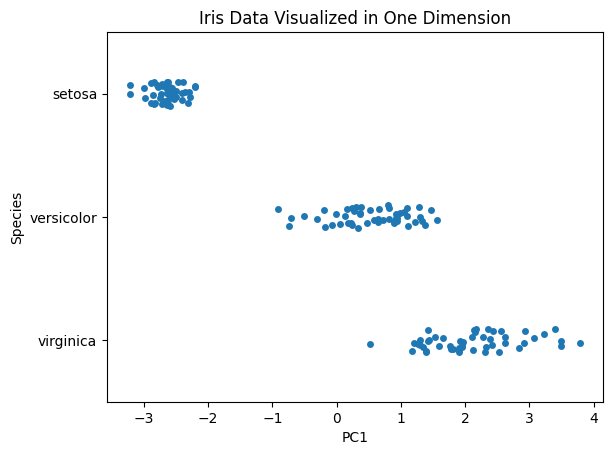

In [255]:
sns.stripplot(x="PC1", y="Species", data=df, jitter=True)
plt.title("Iris Data Visualized in One Dimension")

Text(0.5, 1.0, 'Iris Data Visualized in Two Dimensions')

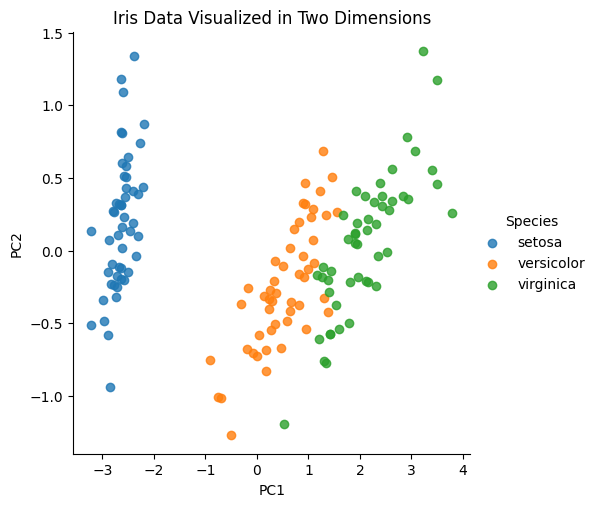

In [256]:
sns.lmplot(x="PC1", y="PC2", data=df, hue="Species", fit_reg=False)
plt.title("Iris Data Visualized in Two Dimensions")

In [257]:
# display the components of the PCA
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

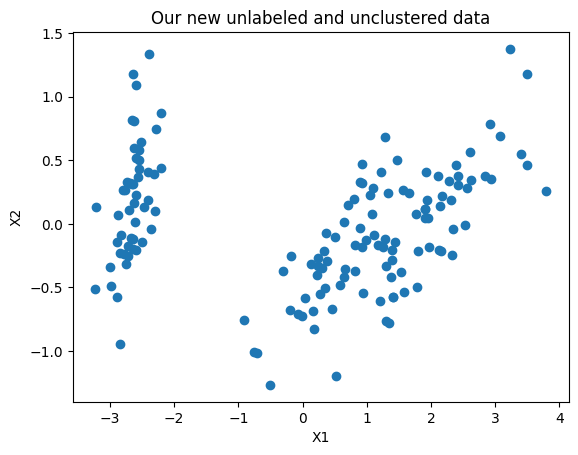

In [258]:
new_X = X_pca[:, :2]

plt.scatter(new_X[:, 0], new_X[:, 1])
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Our new unlabeled and unclustered data")
plt.show()

# Apply K-Means (k=2)


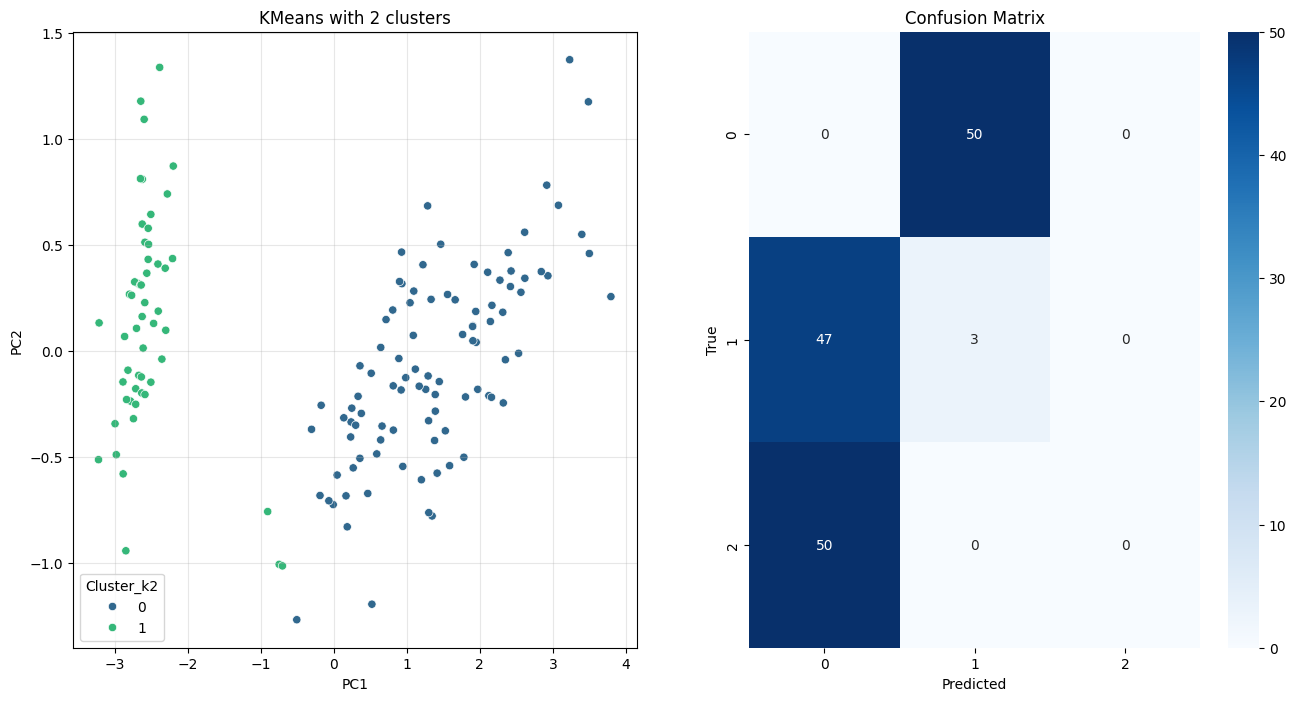

In [259]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(new_X)

y_kmeans = kmeans.predict(new_X)

df["Cluster_k2"] = kmeans.labels_

labels_true = iris.target

cm = confusion_matrix(labels_true, df["Cluster_k2"])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

sns.scatterplot(x="PC1", y="PC2", data=df, hue="Cluster_k2", palette="viridis")
plt.grid(alpha=0.3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans with 2 clusters")

plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

plt.show()

# Apply k-Means (k=3)


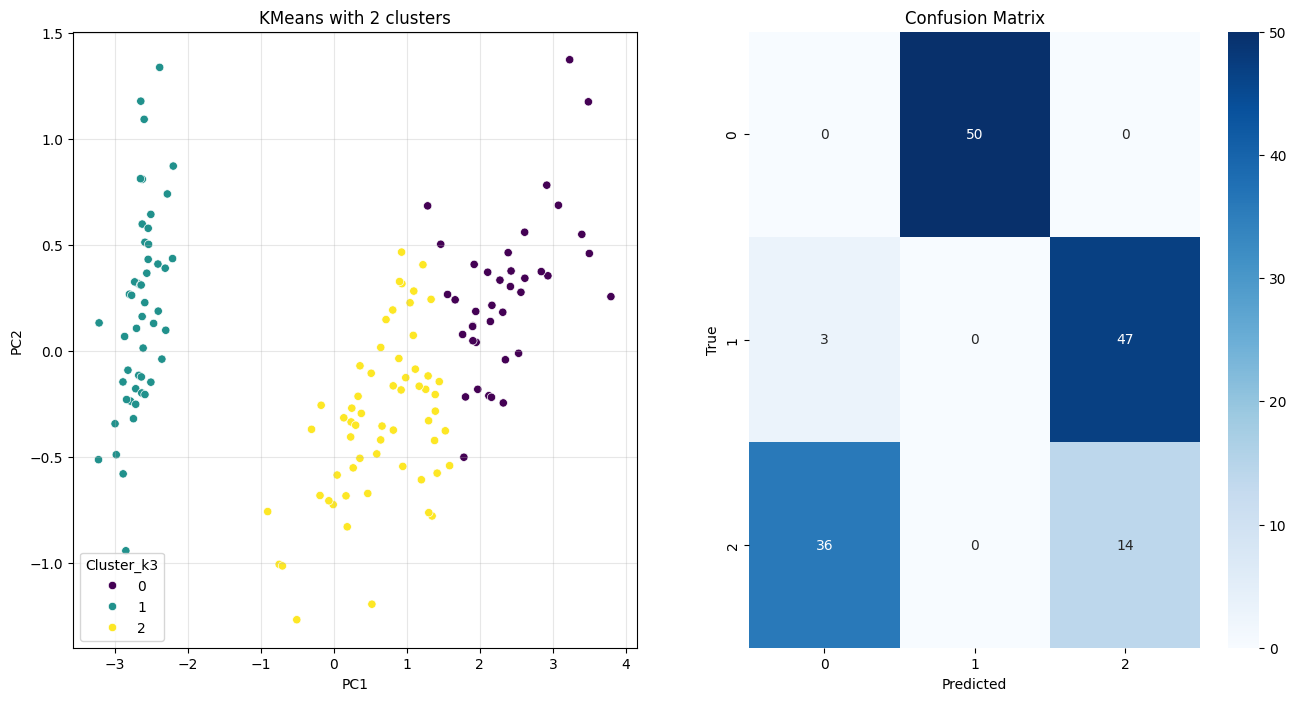

In [260]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_X)

y_kmeans = kmeans.predict(new_X)

df["Cluster_k3"] = kmeans.labels_

labels_true = iris.target

cm = confusion_matrix(labels_true, df["Cluster_k3"])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

sns.scatterplot(x="PC1", y="PC2", data=df, hue="Cluster_k3", palette="viridis")
plt.grid(alpha=0.3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans with 2 clusters")

plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

plt.show()

# Apply mini batch k-means (k=3)


In [261]:
def cluster_and_plot(model, new_X, df, labels_true):
    if isinstance(model, GaussianMixture):
        df["Cluster"] = model.fit_predict(new_X)
    else:
        model.fit(new_X)
        df["Cluster"] = model.labels_

    cm = confusion_matrix(labels_true, df["Cluster"])

    if hasattr(model, "cluster_centers_"):
        centers = model.cluster_centers_
    else:
        centers = None

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)

    sns.scatterplot(x="PC1", y="PC2", data=df, hue="Cluster", palette="viridis")
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="x")
    plt.grid(alpha=0.3)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f"{model.__class__.__name__} Clustering")

    plt.subplot(1, 2, 2)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")

    plt.show()

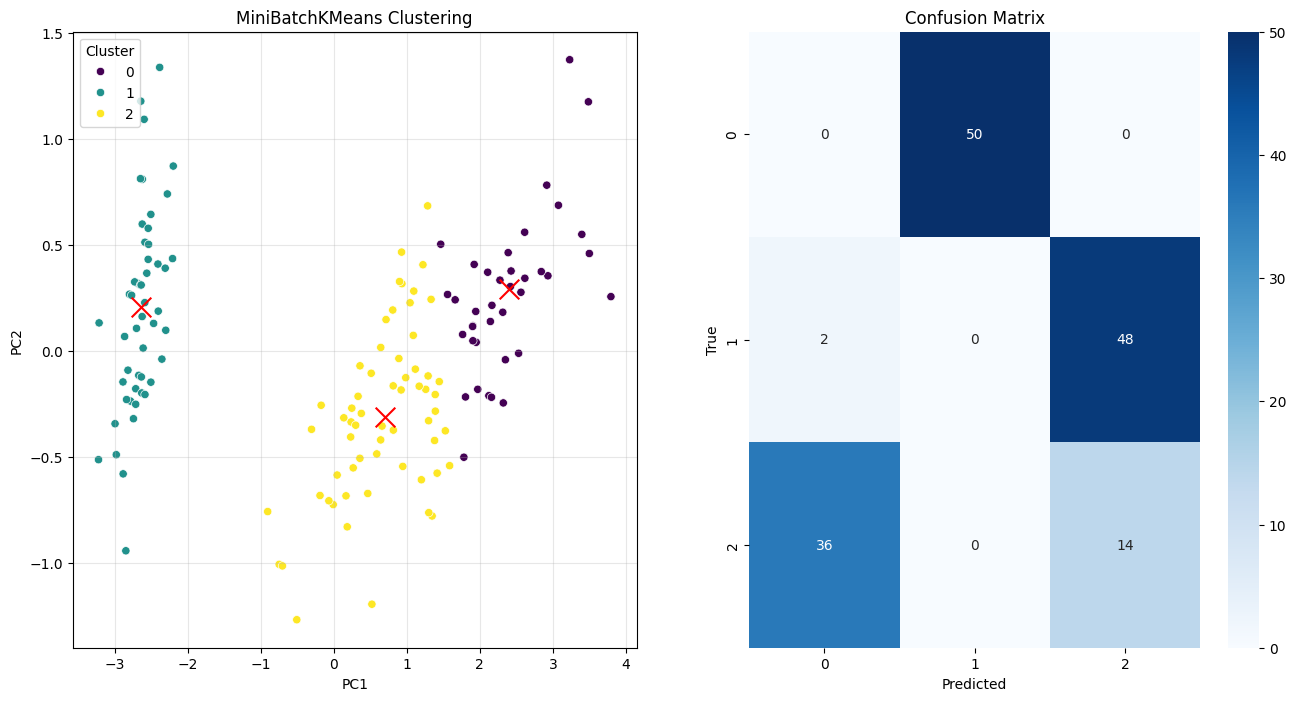

In [262]:
mini_batch_kmeans = MiniBatchKMeans(n_clusters=3)
cluster_and_plot(mini_batch_kmeans, new_X, df, labels_true)

# Apply Affinity Propagation Clustering


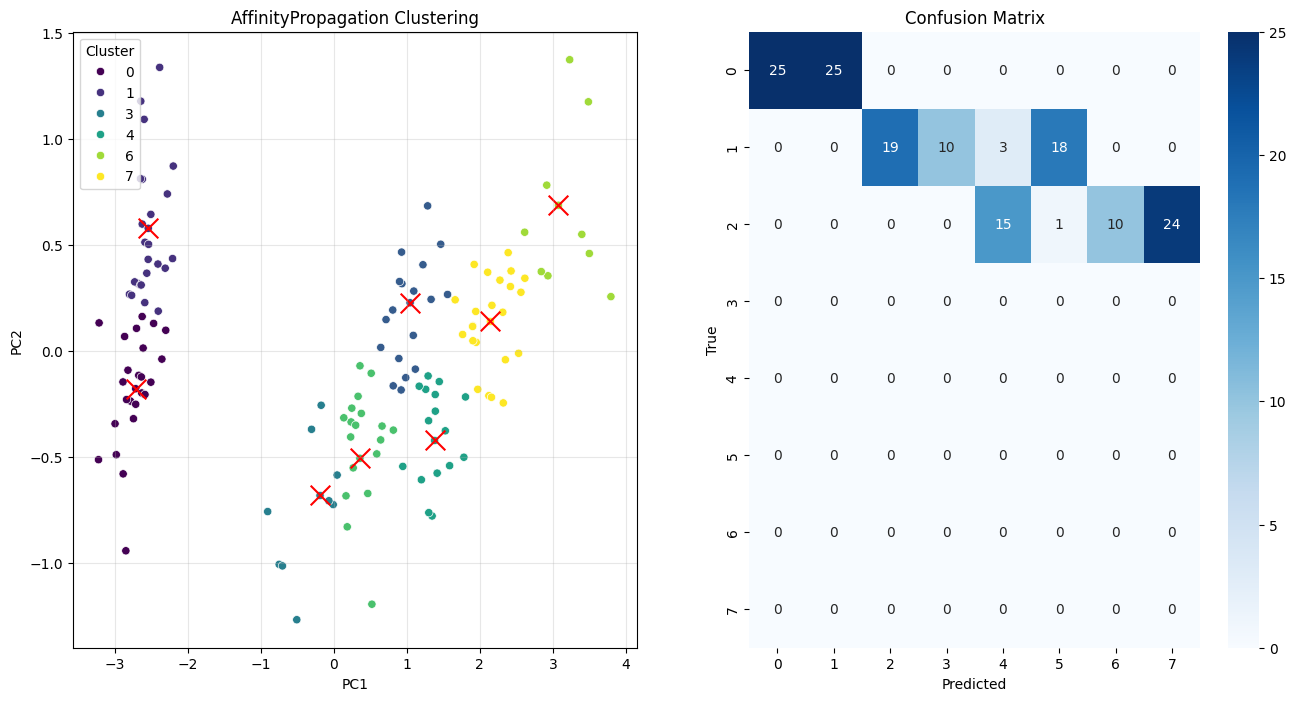

In [263]:
affinity_propagation = AffinityPropagation()
cluster_and_plot(affinity_propagation, new_X, df, labels_true)

# Apply Mean Shift Clustering


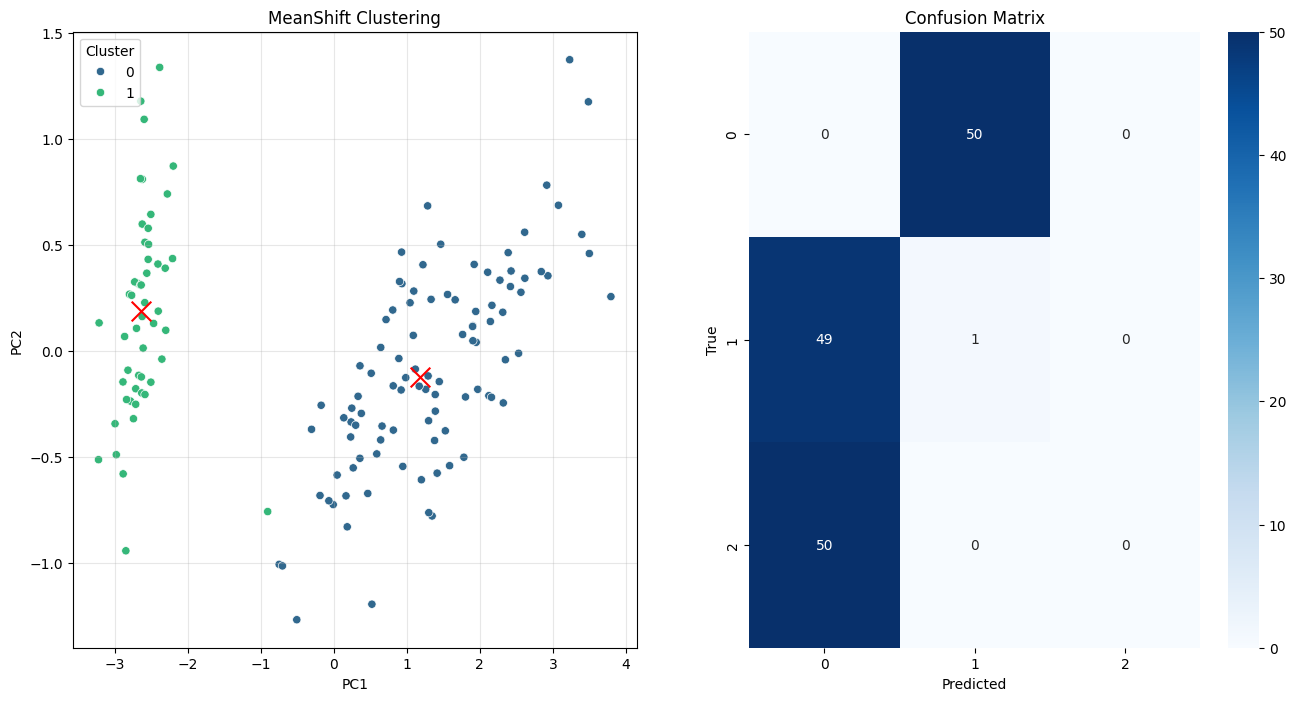

In [264]:
mean_shift = MeanShift()
cluster_and_plot(mean_shift, new_X, df, labels_true)

# Spectral Clustering


/home/enzo/dev/artificial_intelligence/tp/.env/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


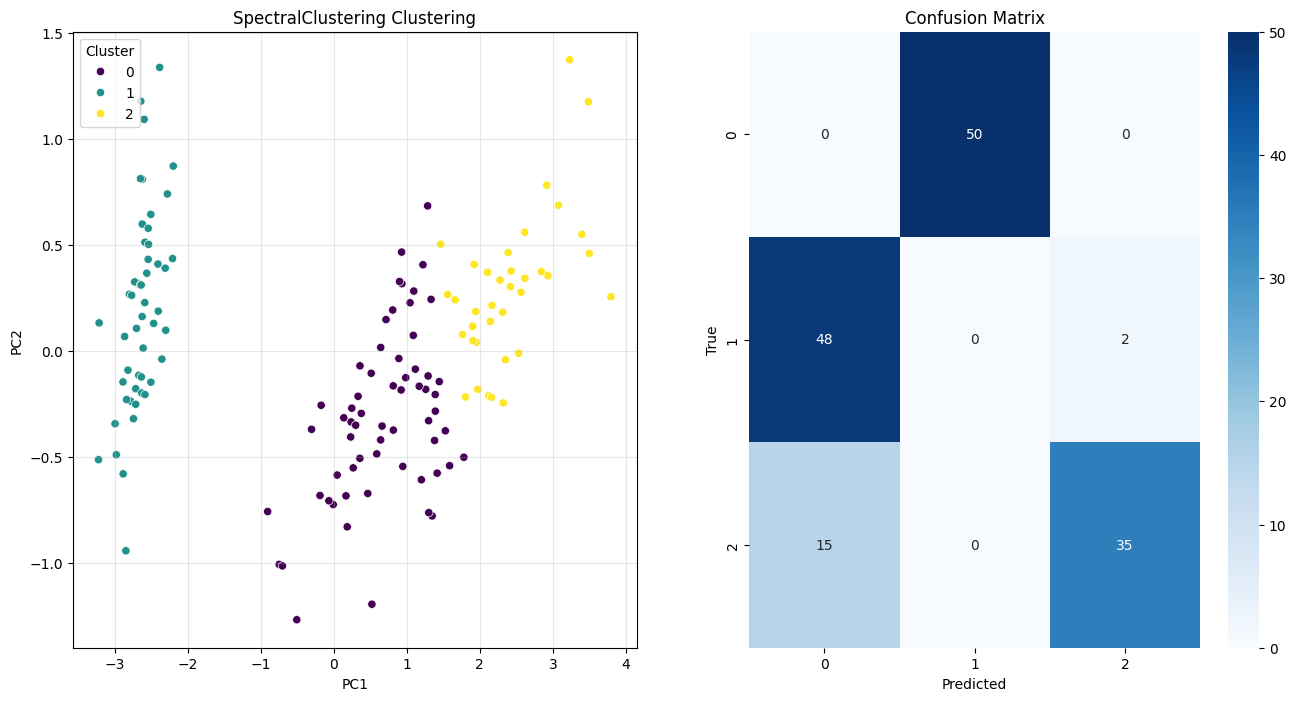

In [265]:
spectral_clustering = SpectralClustering(n_clusters=3, affinity="nearest_neighbors")
cluster_and_plot(spectral_clustering, new_X, df, labels_true)

# Agglomerative Clustering


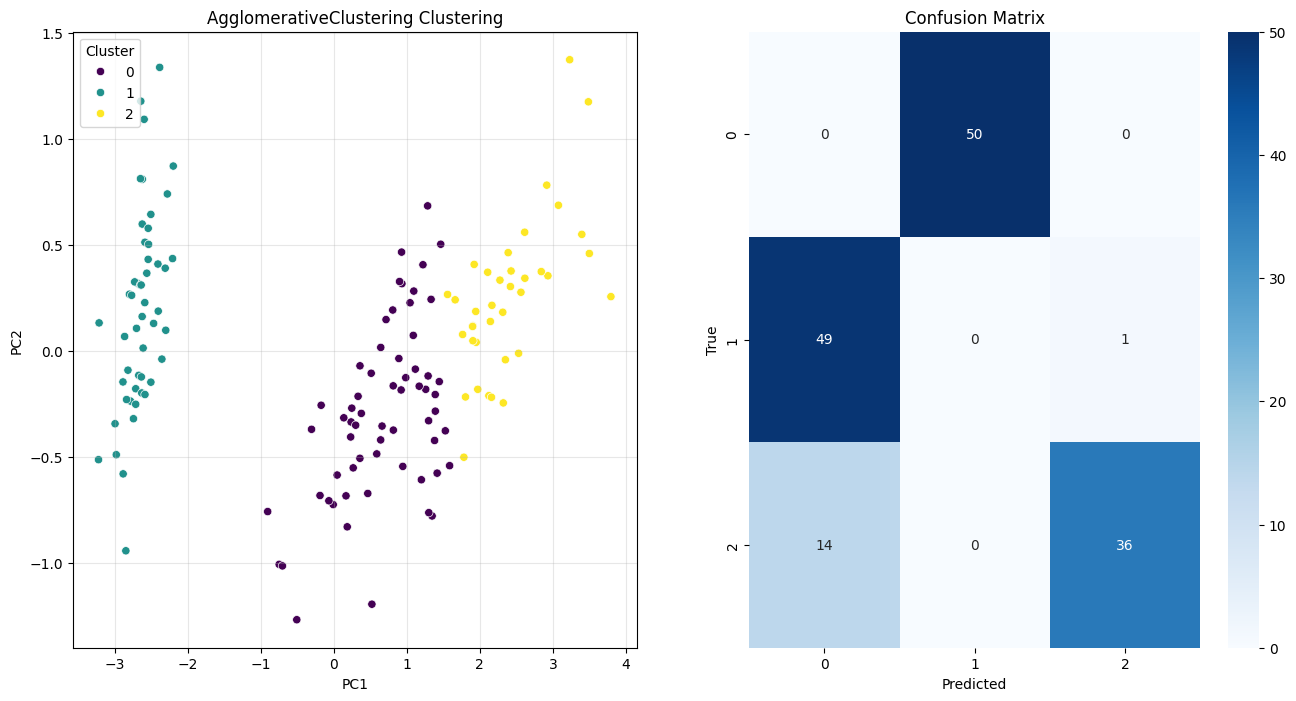

In [266]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
cluster_and_plot(agg_clustering, new_X, df, labels_true)

# Gaussian Misture Clustering


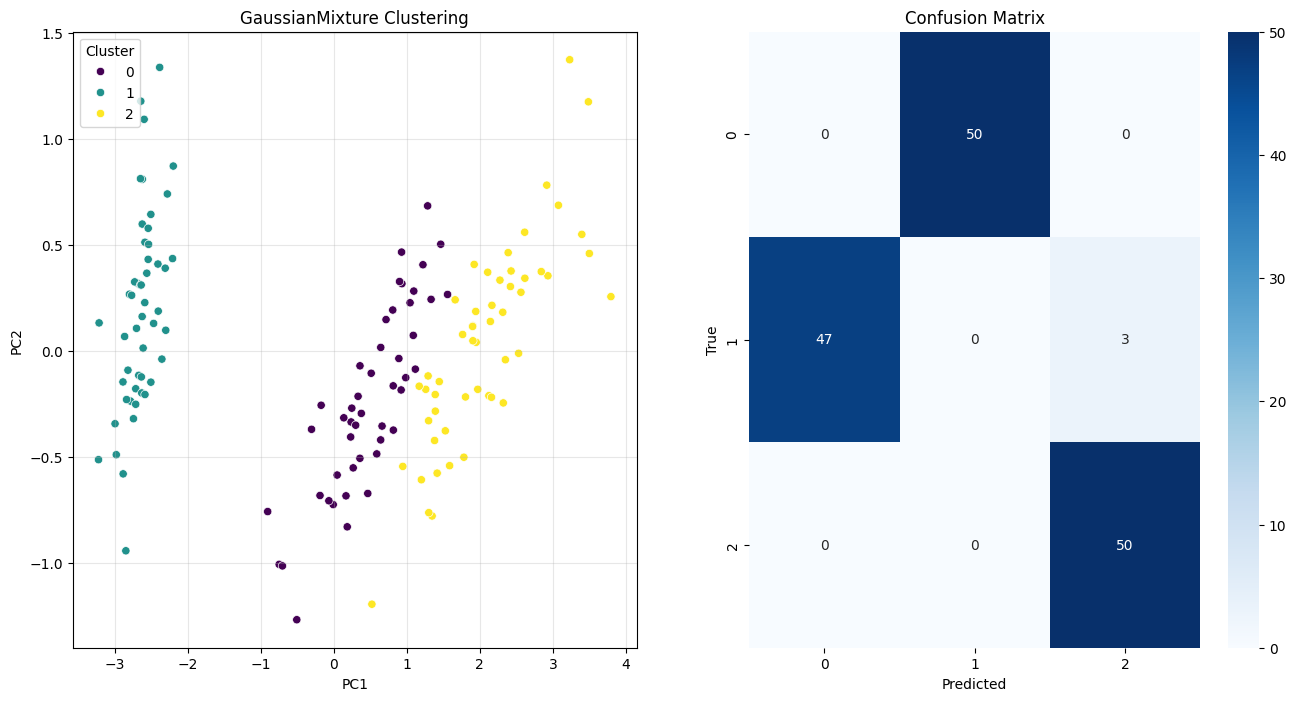

In [267]:
gmm = GaussianMixture(n_components=3)
cluster_and_plot(gmm, new_X, df, labels_true)

# Accuracy based on original labels

Now consider the original IRIS labels ans measure the accuracy of each clustering labelling


In [269]:
labels_true = iris.target

ari_scores = {
    "K-Means (k=2)": adjusted_rand_score(labels_true, df["Cluster_k2"]),
    "K-Means (k=3)": adjusted_rand_score(labels_true, df["Cluster_k3"]),
    "Mini Batch K-Means (k=3)": adjusted_rand_score(labels_true, df["Cluster"]),
    "Affinity Propagation": adjusted_rand_score(labels_true, df["Cluster"]),
    "Mean Shift": adjusted_rand_score(labels_true, df["Cluster"]),
    "Spectral Clustering": adjusted_rand_score(labels_true, df["Cluster"]),
    "Agglomerative Clustering": adjusted_rand_score(labels_true, df["Cluster"]),
    "Gaussian Mixture Clustering": adjusted_rand_score(labels_true, df["Cluster"]),
}

for method, score in ari_scores.items():
    print(f"{method}: {score*100:.4f}%")

print(
    "\nThe best clustering method here is: {}".format(
        max(ari_scores, key=ari_scores.get)
    )
)
print(
    "The worst clustering method here is: {}".format(
        min(ari_scores, key=ari_scores.get)
    )
)

K-Means (k=2): 53.9922%
K-Means (k=3): 71.6342%
Mini Batch K-Means (k=3): 94.1045%
Affinity Propagation: 94.1045%
Mean Shift: 94.1045%
Spectral Clustering: 94.1045%
Agglomerative Clustering: 94.1045%
Gaussian Mixture Clustering: 94.1045%

The best clustering method here is: Mini Batch K-Means (k=3)
The worst clustering method here is: K-Means (k=2)
